In [1]:
options(repr.plot.width=8, repr.plot.height=4)

In [2]:
data <- read.csv("./data/monthly-sales-for-a-souvenir-sho.csv")
suv <- ts(data$Sales)

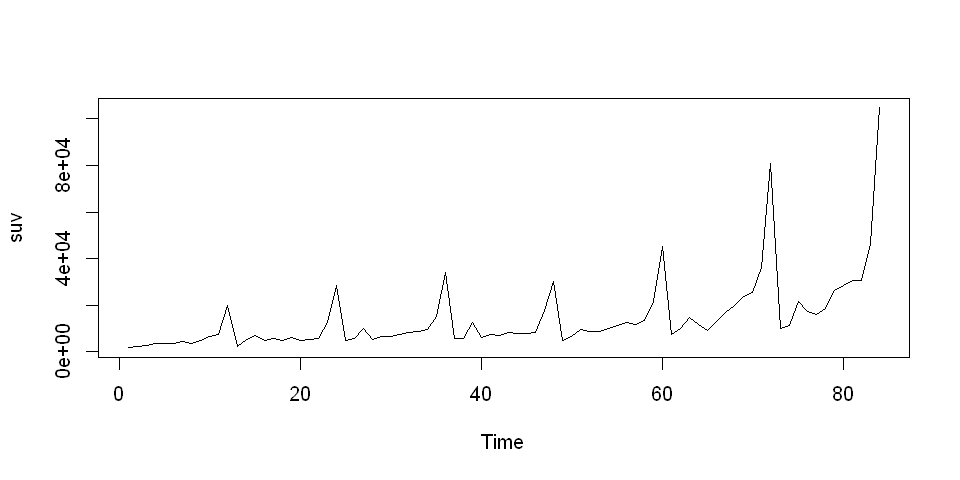

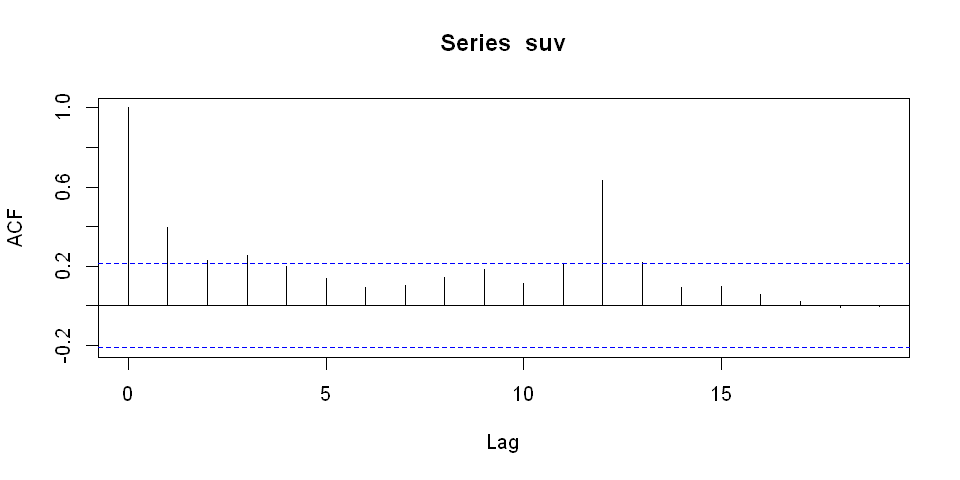

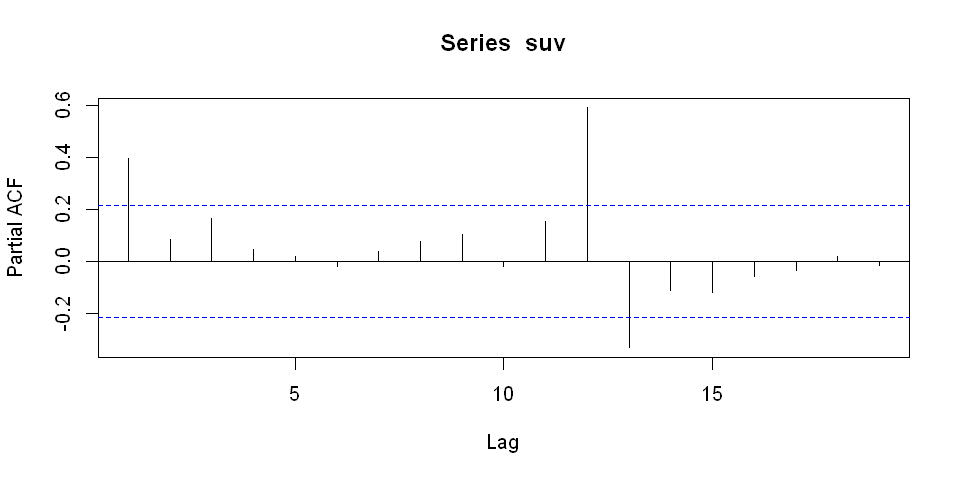

In [3]:
plot(suv)
acf(suv)
pacf(suv)

Observed:
- Variation in variance
- Trend
- Seasonality

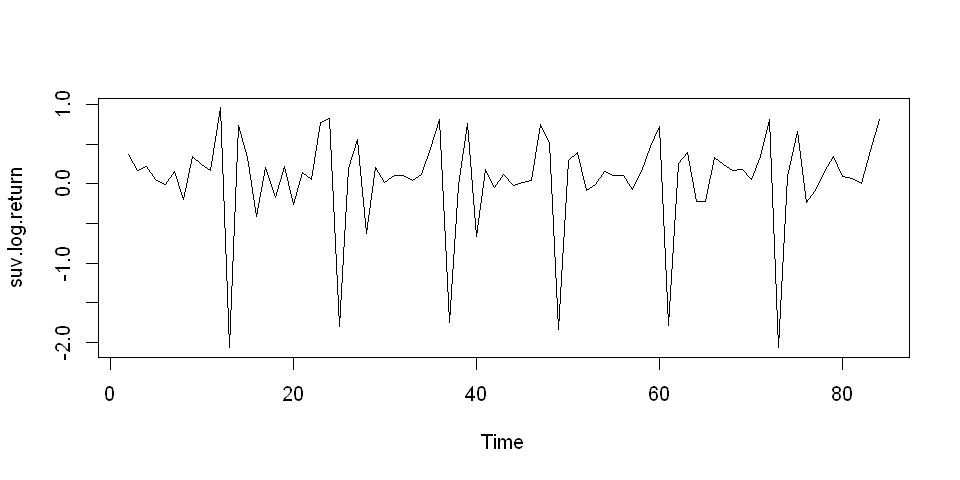

In [4]:
suv.log.return = diff(log(suv))
plot(suv.log.return)

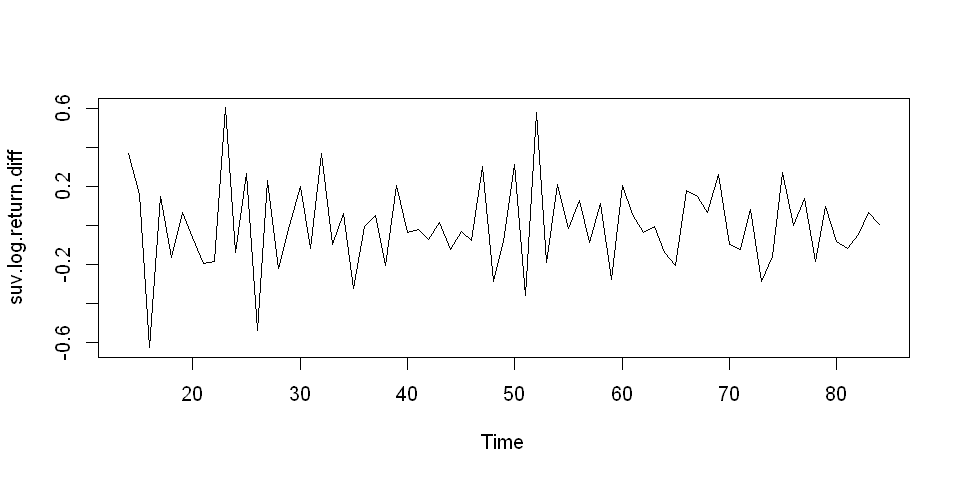

In [5]:
suv.log.return.diff = diff(suv.log.return, 12)
plot(suv.log.return.diff)

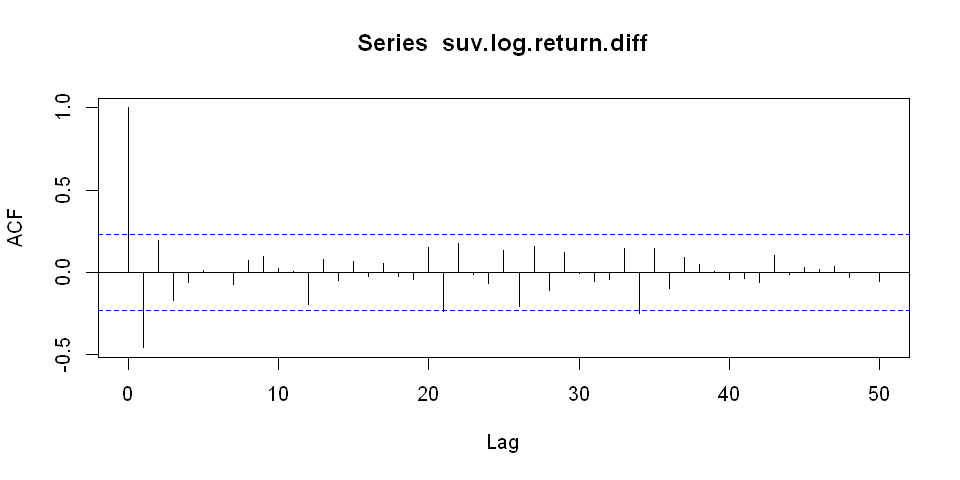

In [6]:
acf(suv.log.return.diff, 50)

ACF suggests:
- q = 0, 1
- Q = 0, 1

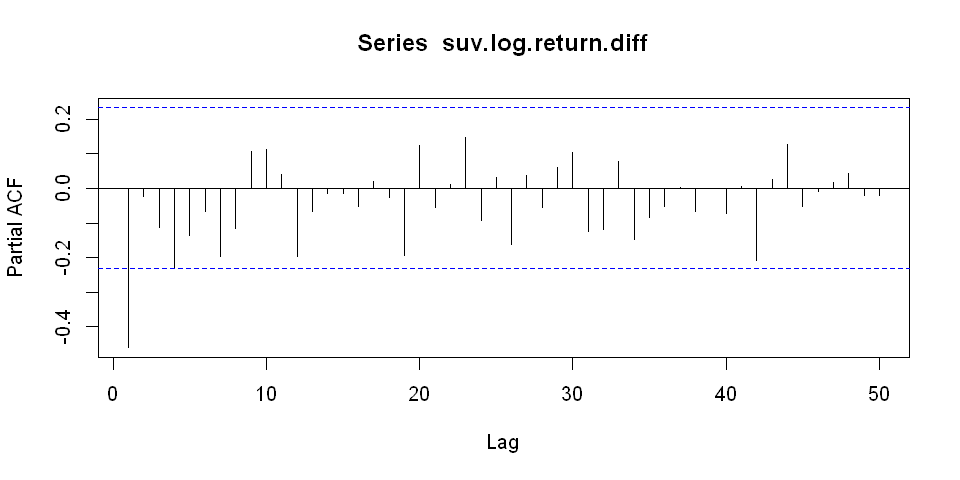

In [7]:
pacf(suv.log.return.diff, 50)

PACF suggests:
- p = 0, 1
- P = 0, 1

In [8]:
d <- 1
D <- 1
s <- 12
df.results <- data.frame()

for (p in 0:1) {
    for (q in 0:1) {
        for (P in 0:1) {
            for (Q in 0:3) {
                if (p + d + q + P + D + Q > 6) {
                    next
                }
                model <- arima(x=log(suv), order=c(p, d, q), seasonal=list(order=c(P, D, Q), period=s))
                p.value <- Box.test(model$residuals, lag=log(length(model$residuals)))$p.value
                df.result <- data.frame(
                    model=paste("SARIMA(", paste(p, d, q, P, D, Q, sep=","), "), ", s, sep=""), 
                    AIC=model$aic, SSE=sum(resid(model)^2), P.value=p.value)
                df.results <- rbind(df.results, df.result)
            }
        }
    }
}

In [9]:
df.results

model,AIC,SSE,P.value
"SARIMA(0,1,0,0,1,0), 12",-11.60664,3.432906,1.365566e-04
"SARIMA(0,1,0,0,1,1), 12",-16.09179,2.977560,3.149952e-05
"SARIMA(0,1,0,0,1,2), 12",-17.58234,2.301963,2.456591e-04
"SARIMA(0,1,0,0,1,3), 12",-16.41016,2.352660,3.392283e-04
"SARIMA(0,1,0,1,1,0), 12",-13.43083,3.214065,4.083839e-05
"SARIMA(0,1,0,1,1,1), 12",-17.76362,2.399746,1.916565e-04
"SARIMA(0,1,0,1,1,2), 12",-15.99095,2.349897,2.477782e-04
"SARIMA(0,1,0,1,1,3), 12",-14.74777,2.302026,4.504601e-04
"SARIMA(0,1,1,0,1,0), 12",-27.78538,2.643277,1.742478e-01
"SARIMA(0,1,1,0,1,1), 12",-34.54538,2.233424,2.730783e-01


In [10]:
df.results[which.min(df.results$AIC),]

,model,AIC,SSE,P.value
17,"SARIMA(1,1,0,0,1,1), 12",-34.98918,2.209442,0.4633806


initial  value -1.527727 
iter   2 value -1.675635
iter   3 value -1.682326
iter   4 value -1.682437
iter   5 value -1.682439
iter   5 value -1.682439
iter   5 value -1.682439
final  value -1.682439 
converged
initial  value -1.692103 
iter   2 value -1.704334
iter   3 value -1.707567
iter   4 value -1.707595
iter   5 value -1.707595
iter   5 value -1.707595
iter   5 value -1.707595
final  value -1.707595 
converged


$fit

Call:
stats::arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, 
    Q), period = S), include.mean = !no.constant, transform.pars = trans, fixed = fixed, 
    optim.control = list(trace = trc, REPORT = 1, reltol = tol))

Coefficients:
          ar1     sma1
      -0.5017  -0.5107
s.e.   0.1013   0.1543

sigma^2 estimated as 0.03111:  log likelihood = 20.49,  aic = -34.99

$degrees_of_freedom
[1] 69

$ttable
     Estimate     SE t.value p.value
ar1   -0.5017 0.1013 -4.9531  0.0000
sma1  -0.5107 0.1543 -3.3098  0.0015

$AIC
[1] -0.4266974

$AICc
[1] -0.4248449

$BIC
[1] -0.3439164


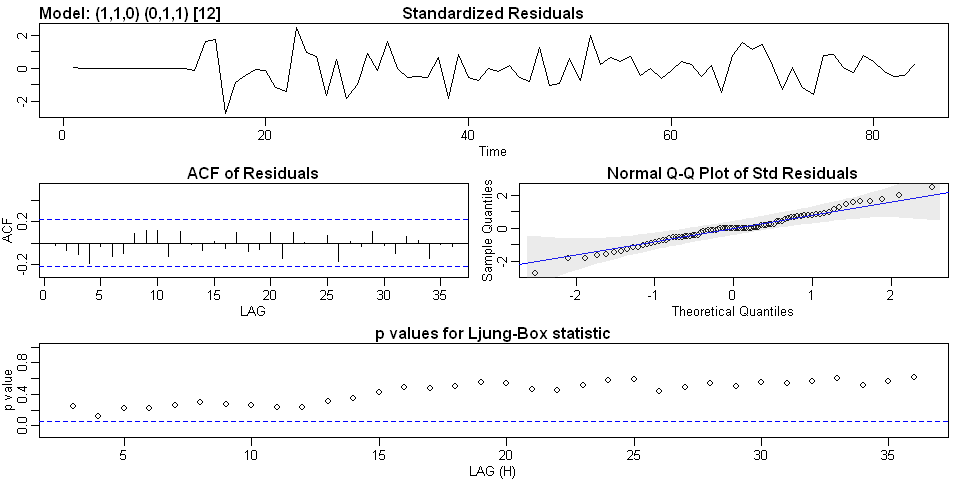

In [11]:
library(astsa)

sarima(log(suv), 1, 1, 0, 0, 1, 1, 12)

Final model:

$$ (1 - \phi B)(1 - B)(1 - B^{12}) Y_t = (1 + \Theta B^{12})e_t $$

where $Y_t = \log(X_t)$, $\phi = -0.5017$, $\Theta = -0.5107$, $e_t \sim N(0, 0.03111)$.

$$ Y_t = 0.4983 Y_{t-1} + 0.5017 Y_{t-2} - 0.4983 Y_{t-13} - 0.5017 Y_{t-14} + e_t - 0.5017 e_{t-12} $$

Warning message:
"package 'forecast' was built under R version 3.6.1"

    Point Forecast     Lo 80     Hi 80     Lo 95     Hi 95
 85       9.600019  9.373968  9.826071  9.254303  9.945736
 86       9.786505  9.533944 10.039066  9.400246 10.172764
 87      10.329605 10.025423 10.633786  9.864399 10.794810
 88      10.081973  9.746705 10.417240  9.569225 10.594720
 89      10.008096  9.638604 10.377587  9.443007 10.573184
 90      10.181170  9.783094 10.579245  9.572365 10.789974
 91      10.439372 10.013362 10.865383  9.787845 11.090900
 92      10.534857 10.083237 10.986477  9.844164 11.225551
 93      10.613026 10.136886 11.089165  9.884833 11.341218
 94      10.664526 10.165207 11.163846  9.900883 11.428170
 95      11.096784 10.575248 11.618321 10.299163 11.894406
 96      11.877167 11.334355 12.419979 11.047007 12.707326
 97       9.932756  9.330373 10.535139  9.011491 10.854021
 98      10.112194  9.475681 10.748707  9.138731 11.085657
 99      10.658829  9.980844 11.336814  9.621940 11.695718
100      10.409423  9.696788 11.122058  9.319542 11.4993

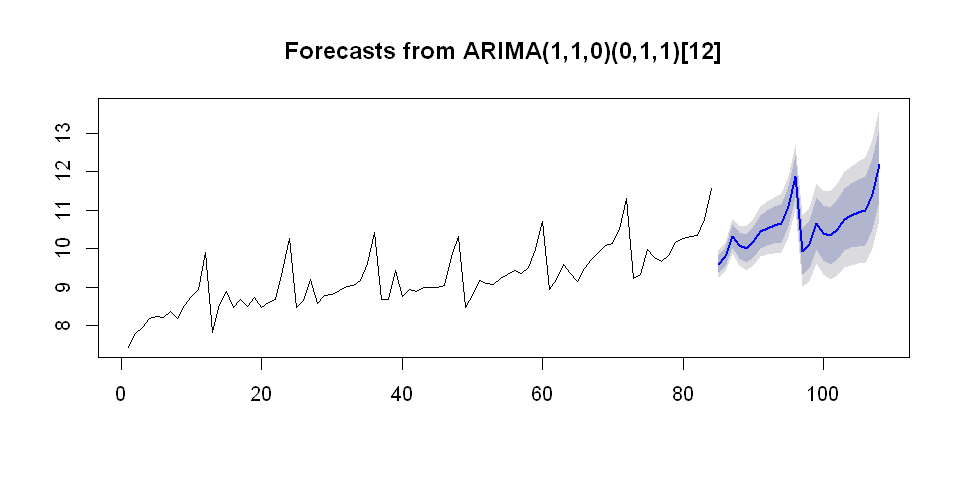

In [12]:
suppressMessages(library(forecast))

model <- arima(x=log(suv), order=c(1, 1, 0), seasonal=list(order=c(0, 1, 1), period=12))
model.forecast <- forecast(model)
model.forecast
plot(model.forecast)

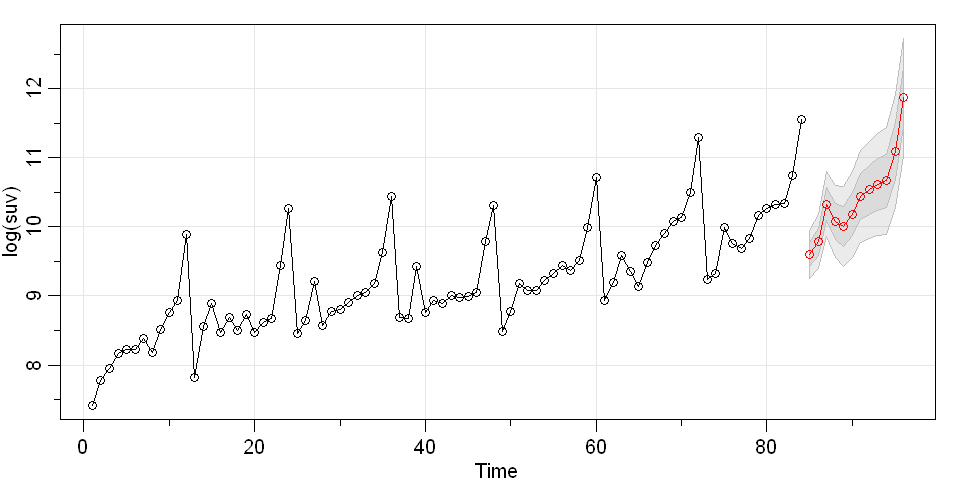

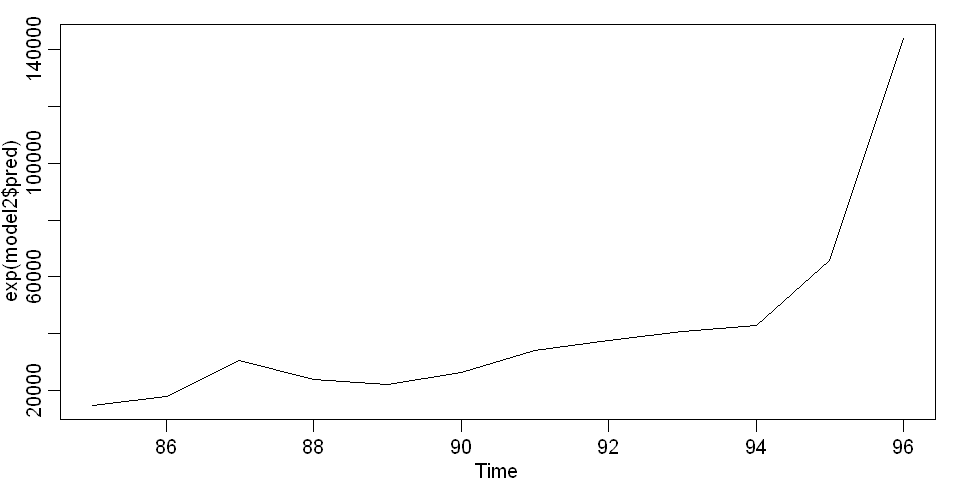

In [13]:
model2 <- sarima.for(log(suv), 12, 1, 1, 0, 0, 1, 1, 12)
plot.ts(exp(model2$pred))

Try p from 0 to 3:

In [14]:
d <- 1
D <- 1
s <- 12
df.results <- data.frame()

for (p in 0:1) {
    for (q in 0:3) {
        for (P in 0:1) {
            for (Q in 0:3) {
                if (p + d + q + P + D + Q > 6) {
                    next
                }
                model <- arima(x=log(suv), order=c(p, d, q), seasonal=list(order=c(P, D, Q), period=s))
                p.value <- Box.test(model$residuals, lag=log(length(model$residuals)))$p.value
                df.result <- data.frame(
                    model=paste("SARIMA(", paste(p, d, q, P, D, Q, sep=","), "), ", s, sep=""), 
                    AIC=model$aic, SSE=sum(resid(model)^2), P.value=p.value)
                df.results <- rbind(df.results, df.result)
            }
        }
    }
}

In [15]:
df.results

model,AIC,SSE,P.value
"SARIMA(0,1,0,0,1,0), 12",-11.60664,3.432906,1.365566e-04
"SARIMA(0,1,0,0,1,1), 12",-16.09179,2.977560,3.149952e-05
"SARIMA(0,1,0,0,1,2), 12",-17.58234,2.301963,2.456591e-04
"SARIMA(0,1,0,0,1,3), 12",-16.41016,2.352660,3.392283e-04
"SARIMA(0,1,0,1,1,0), 12",-13.43083,3.214065,4.083839e-05
"SARIMA(0,1,0,1,1,1), 12",-17.76362,2.399746,1.916565e-04
"SARIMA(0,1,0,1,1,2), 12",-15.99095,2.349897,2.477782e-04
"SARIMA(0,1,0,1,1,3), 12",-14.74777,2.302026,4.504601e-04
"SARIMA(0,1,1,0,1,0), 12",-27.78538,2.643277,1.742478e-01
"SARIMA(0,1,1,0,1,1), 12",-34.54538,2.233424,2.730783e-01


In [16]:
df.results[which.min(df.results$AIC),]

,model,AIC,SSE,P.value
22,"SARIMA(0,1,3,0,1,1), 12",-37.55951,1.993621,0.9413636
